In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib as mpl
#plt.style.use('ggplot')

## Load data

In [2]:
initialDataTypes={'Shift':np.int8, 'Lane':str, 'Clicker':str, 'Veto':str, 'X1':str, 'X2a':str, 'X2b':str, 'X3':str, 'X4':str, 'X5a':str, 'X5b':str, 'DataEntryPerson':np.int8}
rawData = pd.read_csv("data/MergedData_DecomNov18.csv",dtype=initialDataTypes)

In [3]:
for col in initialDataTypes:
    print("Adjusting %s to %s" % (col, str(initialDataTypes[col])))
    rawData[col] = rawData[col].astype(initialDataTypes[col])

Adjusting Shift to <class 'numpy.int8'>
Adjusting Lane to <class 'str'>
Adjusting Clicker to <class 'str'>
Adjusting Veto to <class 'str'>
Adjusting X1 to <class 'str'>
Adjusting X2a to <class 'str'>
Adjusting X2b to <class 'str'>
Adjusting X3 to <class 'str'>
Adjusting X4 to <class 'str'>
Adjusting X5a to <class 'str'>
Adjusting X5b to <class 'str'>
Adjusting DataEntryPerson to <class 'numpy.int8'>


In [4]:
print("Size of dataset: %d" % len(rawData))

Size of dataset: 678


In [5]:
rawData.dtypes #check of initial type recognition before cleaning

Shift                int8
Lane               object
Clicker            object
Veto               object
X1                 object
X2a                object
X2b                object
X3                 object
X4                 object
X5a                object
X5b                object
DataEntryPerson      int8
dtype: object

In [6]:
rawData.head(10)

,Shift,Lane,Clicker,Veto,X1,X2a,X2b,X3,X4,X5a,X5b,DataEntryPerson
0,5,o,1280,.,82,2,Oakland,2,1,2,9,1
1,5,o,1300,.,66,2,Castro Valley,2,1,2,10,1
2,5,o,1310,.,.,2,.,2,1,1,1,1
3,5,o,1330,.,84,1,.,1,1,2,9,1
4,5,o,1340,.,88,3,"Dallas, TX",1,2,3,0,1
5,5,o,1350,.,91,1,.,1,2,3,.,1
6,5,o,1360,.,{illegible},1,.,1,1,3,0,1
7,5,o,1370,a,nan,nan,nan,nan,nan,nan,nan,1
8,5,o,1380,.,78,1,.,2,1,2,9,1
9,5,o,1400,a,nan,nan,nan,nan,nan,nan,nan,1


## Cleaning data

In [7]:
# Debug for data cleaning
#rawData['X1'].str.contains('NaN') == False
#for a in rawData['Clicker']:
#    print(type(a).__name__)
#    if type(a).__name__.find('ndarray') >= 0:
#        print('Error fo Clikcer entry: "%s", type=%s' %(a,type(a).__name__))
#rawData.loc[rawData['X2a']==1,'X2b'].astype('category').cat.categories.tolist()

In [8]:
# Simple cleanings
LaneCleaning = {'0':'o', 'O':'o', 'B':'b','.':''}
VetoCleaning = {'67':'', ',':'', ',':'', 'sa':'a', 's (counted by accident)':'s', 'A':'a','c':'c','S':'s'}
ClickerCleaning = {'740(a)':'740', '740(b)':'741', 'NaN':'-1', 'nan':'-1', '': '-1'}
numbersCleanings={'':'-1','.':'-1','nan':'-1'}
X1Cleaning = {'889':'89', '1.21':'1','':'-1', '{illegible}':'-1'}
X2aCleaning = {'21':'2', '32':'2', '34':'3','41':'2','42':'2'}
X3Cleaning = {'13':'3','23':'3'}
X4Cleaning = {}
X5bCleaning = {'.':'-1','nan':-1, 'No':'0', '1 decomp': '-1', '0, I\'m a professor!':'0', '{0 or 2}':'0','{9?}':'9', '2010':'1','6 or 7':'6', 'NA':'-1', 'infinity': '-1', 'Second year':'2','the years before it got so absurdly expensive and full of capitalistic ass holes':'-1'}
rawData['Veto'].replace(VetoCleaning,inplace=True)
rawData['Lane'].replace(LaneCleaning,inplace=True)
rawData['Clicker'].replace(ClickerCleaning,inplace=True)
rawData['X1'].replace({**numbersCleanings, **X1Cleaning},inplace=True)
rawData['X2a'].replace({**numbersCleanings, **X2aCleaning},inplace=True)
rawData['X3'].replace({**numbersCleanings, **X3Cleaning},inplace=True)
rawData['X4'].replace({**numbersCleanings, **X4Cleaning},inplace=True)
rawData['X5a'].replace(numbersCleanings,inplace=True)
rawData['X5b'].replace({**numbersCleanings, **X5bCleaning},inplace=True)

In [9]:
#uniform city names
rawData.loc[rawData.X2a == '1', 'X2b'] = 'San Francisco'
X2bCleaning={}
X2bCleaning['(illegible)'] = ''
X2bCleaning[',']=''
X2bCleaning['.']=''
X2bCleaning['1']=''
X2bCleaning['[illegible]']=''
X2bCleaning['nan']=''
X2bCleaning['Oakland; Houston, TX']='Oakland'
X2bCleaning['{Monterrey?}']='Monterey'
X2bCleaning['digital nomad']=''
X2bCleaning['Vancouver']='Vancouver, Canada'
X2bCleaning['Utah, Tooele']='Tooele, Utah'
X2bCleaning['South San Francisdo']='South San Francisco'
X2bCleaning['Sonoma Cty CA Sebastopol']='Sonoma'
X2bCleaning['Reno']='Reno, NV'
X2bCleaning['Portland']='Portland, OR'
X2bCleaning['NYC']='NYC, NY'
X2bCleaning['NY']='NYC, NY'
X2bCleaning['LA']='Los Angeles'
X2bCleaning['Seattle']='Seattle, WA'
X2bCleaning['Loa Altos Hills']='Los Altos Hills'
X2bCleaning['CA+HI']='CA'
X2bCleaning['Auburn, CA']='Auburn'
X2bCleaning['Austin']='Austin, TX'
#X2bCleaning['']=''
rawData['X2b'].replace(X2bCleaning,inplace=True)

In [10]:
#adjust data-type
dataTypes={'Shift':np.int8, 'Lane':str, 'Clicker':np.int32, 'Veto':str, 'X1':np.int8, 'X2a':np.int8, 'X2b':'category', 'X3':np.int8, 'X4':np.int8, 'X5a':np.int8, 'X5b':np.int8, 'DataEntryPerson':np.int8}
for col in dataTypes:
    print("Adjusting %s to %s" % (col, str(dataTypes[col])))
    rawData[col] = rawData[col].astype(dataTypes[col])
#show results
#rawData.dtypes 

Adjusting Shift to <class 'numpy.int8'>
Adjusting Lane to <class 'str'>
Adjusting Clicker to <class 'numpy.int32'>
Adjusting Veto to <class 'str'>
Adjusting X1 to <class 'numpy.int8'>
Adjusting X2a to <class 'numpy.int8'>
Adjusting X2b to category
Adjusting X3 to <class 'numpy.int8'>
Adjusting X4 to <class 'numpy.int8'>
Adjusting X5a to <class 'numpy.int8'>
Adjusting X5b to <class 'numpy.int8'>
Adjusting DataEntryPerson to <class 'numpy.int8'>


## Weighing of data

In [11]:
totalClikers=pd.read_csv("data/total_counts.csv")
totalClikers['Total'] = totalClikers.iloc[:,2:5].sum(axis=1)
totalClikers.set_index(['Shift','Lane'],inplace=True)
totalClikers

Training  Skip  Clicker  Total
Shift Lane                                
1     s            0     4      186    190
2     b           18     4     1424   1446
      o            0     9     1033   1042
5     b          160     5     1476   1641
      o          160     1     1870   2031
      g            0     0      953    953
8     b          200     2     1040   1242
      o          207     3     1525   1735

In [12]:
populationBySL = rawData.groupby(['Shift','Lane']).Veto.count()
populationBySL

Shift  Lane
1      s        18
2      b         1
       o        86
5      b       143
       g        85
       o       131
8      b        93
       o       121
Name: Veto, dtype: int64

### Veto fraction

In [13]:
#calculate correction factors  for un-even distribution of vetos; will be stored as weightVetos
isVeto = rawData.Veto.isin(['a','s','c'])
vetoWeightNum = rawData.loc[isVeto].groupby(['Shift','Lane']).Veto.count()
vetoWeightNum

Shift  Lane
1      s        3
2      o        6
5      b        9
       g        7
       o       18
8      b        1
       o       13
Name: Veto, dtype: int64

In [14]:
vetoFractions = vetoWeightNum / populationBySL
vetoFractions

Shift  Lane
1      s       0.166667
2      b            NaN
       o       0.069767
5      b       0.062937
       g       0.082353
       o       0.137405
8      b       0.010753
       o       0.107438
Name: Veto, dtype: float64

In [15]:
weightVetos = 1.0 / (1.0 - vetoFractions)
weightVetos.fillna(1.0, inplace=True) #usually means no veto found
rawData['weightVetos'] = [weightVetos.loc[i,j] for i,j in zip(rawData['Shift'],rawData['Lane'])]
rawData.loc[isVeto, 'weightVetos'] = 0.0 #put to zero weight of veto entries
weightVetos

Shift  Lane
1      s       1.200000
2      b       1.000000
       o       1.075000
5      b       1.067164
       g       1.089744
       o       1.159292
8      b       1.010870
       o       1.120370
Name: Veto, dtype: float64

### Sampling fraction

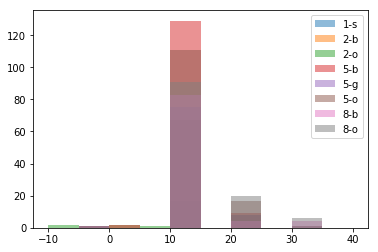

In [16]:
# check distribution of clickers counts, by Lane and Shift
#rawData.query("Shift == 1 & Lane == 's'").Clicker.diff()
for i in np.arange(0, len(populationBySL.index.labels[0])):
    idx1 = populationBySL.index.labels[0][i]
    idx2 = populationBySL.index.labels[1][i]
    l1 = populationBySL.index.levels[0][idx1]
    l2 = populationBySL.index.levels[1][idx2]
    #print("%s-%s" % (l1, l2))
    plt.hist(rawData.query("Shift == %s & Lane == '%s'" % (l1, l2)).Clicker.diff().fillna(-1.0),range=(-10, 40), label="%s-%s"%(l1,l2),alpha=0.5)
plt.legend()
plt.show()

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0., 91.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0., 20.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
         16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
         29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39]),
 <a list of 49 Patch objects>)

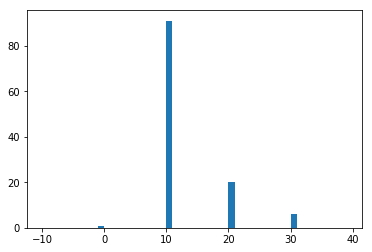

In [17]:
plt.hist(rawData.query("Shift == 8 & Lane == 'o'").Clicker.diff().fillna(-1.0),range(-10,40))

In [18]:
# calculate simple average sampling fraction from total clickers and total data
samplingFractions = populationBySL / totalClikers['Total']
samplingFractions

Shift  Lane
1      s       0.094737
2      b       0.000692
       o       0.082534
5      b       0.087142
       g       0.089192
       o       0.064500
8      b       0.074879
       o       0.069741
dtype: float64

In [19]:
weightSampling = 1.0 / samplingFractions
rawData['weightSampling'] = [weightSampling.loc[i,j] for i,j in zip(rawData['Shift'],rawData['Lane'])]
weightSampling

Shift  Lane
1      s         10.555556
2      b       1446.000000
       o         12.116279
5      b         11.475524
       g         11.211765
       o         15.503817
8      b         13.354839
       o         14.338843
dtype: float64

### Total weight

In [20]:
rawData['weight'] = rawData['weightVetos'] * rawData['weightSampling']
rawData.head()

,Shift,Lane,Clicker,Veto,X1,X2a,X2b,X3,X4,X5a,X5b,DataEntryPerson,weightVetos,weightSampling,weight
0,5,o,1280,.,82,2,Oakland,2,1,2,9,1,1.159292,15.503817,17.973451
1,5,o,1300,.,66,2,Castro Valley,2,1,2,10,1,1.159292,15.503817,17.973451
2,5,o,1310,.,-1,2,,2,1,1,1,1,1.159292,15.503817,17.973451
3,5,o,1330,.,84,1,San Francisco,1,1,2,9,1,1.159292,15.503817,17.973451
4,5,o,1340,.,88,3,"Dallas, TX",1,2,3,0,1,1.159292,15.503817,17.973451


## Calculate basic statistics

In [21]:
isStaff = rawData.Lane.isin(['s'])
totWeights = rawData['weight'].sum() 
totEntries = len(rawData)
isX1Valid = (rawData.X1 > 0) & (~isVeto)
isX2aValid = (rawData.X2a > 0) & (rawData.X2a <= 4) & (~isVeto)
isX2bValid = (rawData['X2b'].apply(len) > 0) & (~isVeto)
isX3Valid = (rawData.X3 > 0) & (rawData.X3 <= 3) & (~isVeto)
isX4Valid = (rawData.X4 > 0) & (rawData.X4 <= 2) & (~isVeto)
isX5aValid = (rawData.X5a > 0) & (rawData.X5a <= 3) & (~isVeto)
isX5bValid = (rawData.X5b >= 0) | (rawData.X5a == 3) & (~isVeto)

In [22]:
currentYear = 18
rawData['Age'] = [ -1 if y == -1 else currentYear+100-y if y > currentYear else currentYear - y for y in rawData['X1']]

In [23]:
#DEBUG invalid entries to check
#rawData.loc[~isX4Valid & isX2aValid] #People who decided to not tell where they live
#rawData.loc[~isX1Valid]
#rawData['X2a'].astype('category').cat.categories
#list(rawData.groupby('X2a').agg({'weight':'sum'})['weight'].keys())

In [24]:
# Average weight
totWeights / totEntries

15.162241887905607

In [25]:
print("Total number of weighted (raw) entries: %d (%d)" % (rawData['weight'].sum(),len(rawData)))
print("-- Staff: %.1f (%d) -> %.1f%% (%.1f%%)" % (rawData.loc[isStaff, 'weight'].sum(), len(rawData.loc[isStaff]), rawData.loc[isStaff, 'weight'].sum()*100.0 / totWeights, len(rawData.loc[isStaff])*100.0 / totEntries))
print("-- Vetos: %d -> %.1f%%" % (len(rawData.loc[isVeto]), len(rawData.loc[isVeto])*100.0/totEntries))
print("Fraction of invalid answers (excluding vetos):")
print("-- 1: %d (%.1f%%)" % (len(rawData.loc[~isX1Valid & ~isVeto]), len(rawData.loc[~isX1Valid & ~isVeto])*100./totEntries))
print("-- 2a: %d (%.1f%%)" % (len(rawData.loc[~isX2aValid & ~isVeto]), len(rawData.loc[~isX2aValid & ~isVeto])*100./totEntries))
print("-- 2b: %d (%.1f%%)" % (len(rawData.loc[~isX2bValid & ~isVeto]), len(rawData.loc[~isX2bValid & ~isVeto])*100./totEntries))
print("-- 3: %d (%.1f%%)" % (len(rawData.loc[~isX3Valid & ~isVeto]), len(rawData.loc[~isX3Valid & ~isVeto])*100./totEntries))
print("-- 4: %d (%.1f%%)" % (len(rawData.loc[~isX4Valid & ~isVeto]), len(rawData.loc[~isX4Valid & ~isVeto])*100./totEntries))
print("-- 5a: %d (%.1f%%)" % (len(rawData.loc[~isX5aValid & ~isVeto]), len(rawData.loc[~isX5aValid & ~isVeto])*100./totEntries))
print("-- 5b: %d (%.1f%%)" % (len(rawData.loc[~isX5bValid & ~isVeto]), len(rawData.loc[~isX5bValid & ~isVeto])*100./totEntries))

Total number of weighted (raw) entries: 10280 (678)
-- Staff: 190.0 (18) -> 1.8% (2.7%)
-- Vetos: 57 -> 8.4%
Fraction of invalid answers (excluding vetos):
-- 1: 49 (7.2%)
-- 2a: 8 (1.2%)
-- 2b: 37 (5.5%)
-- 3: 5 (0.7%)
-- 4: 6 (0.9%)
-- 5a: 11 (1.6%)
-- 5b: 29 (4.3%)


## Plot univariate distributions

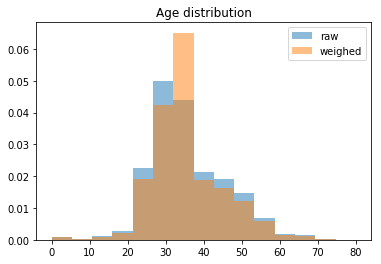

In [26]:
#Check effect of weights using Age distribution
binsAge = np.linspace(0, 80, 16)
plt.hist(rawData.loc[isX1Valid, 'Age'], binsAge, density=True, alpha=0.5, label='raw')
plt.hist(rawData.loc[isX1Valid, 'Age'], binsAge, density=True, weights=rawData.loc[isX1Valid, 'weight'], alpha=0.5, label='weighed')
plt.legend(loc='upper right')
plt.title('Age distribution')
plt.show()

Text(0.5,1,'Age distribution')

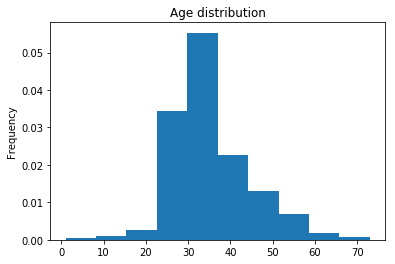

In [27]:
rawData.loc[isX1Valid, 'Age'].plot.hist(density=True,weights=rawData.loc[isX1Valid,'weight'])
plt.title('Age distribution')

In [28]:
#Utility function for categorical plotting
# df: DF where input data is
# col: column name to plot
# weight: column where weight is stored, if any
# density: normalize to unit area
# percent: if density==True, use an area of 100 for normalization
# **kwargs: other keyworded arguments for plotting function
def plotCatQ(df, col, weight='', density=True, percent=True, title='', xlabels=[], plotBarFcn=plt.bar, **kwargs):
    if weight != '':
        newDF = df.groupby(col).agg({weight:'sum'})[weight]
    else:
        newDF = df.loc[:,col].value_counts()
    ylabel="Frequency"
    if density:
        newDF = newDF / newDF.sum()
        ylabel="Density"
        if (percent):
            newDF = newDF * 100.0
            ylabel="Density (%)"
    names = list(newDF.keys())
    values = list(newDF.values)
    plotBarFcn(names,values, **kwargs)
    if (len(xlabels) > 0):
        plt.xticks(np.arange(1,len(xlabels)+1,1.0),  xlabels)
    if (len(title) > 0):
        plt.title(title)
    plt.ylabel(ylabel)

Text(0.5,1,'Residence')

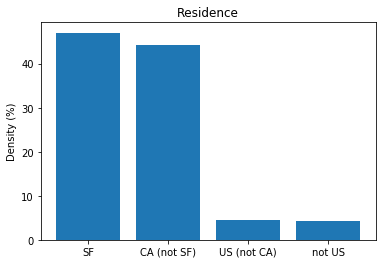

In [29]:
plotCatQ(rawData.loc[isX2aValid], 'X2a', weight='weight')
plt.xticks(np.arange(1,5,1.0),  ['SF', 'CA (not SF)', 'US (not CA)', 'not US'])
plt.title('Residence')

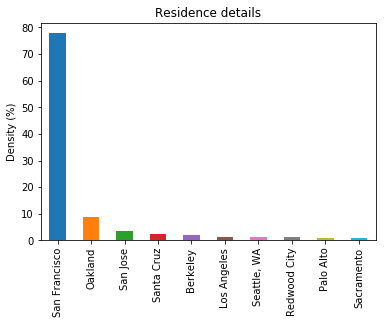

In [30]:
vals = rawData.loc[isX2bValid,'X2b'].value_counts()[0:10]
vals = vals * 100.0 / vals.sum()
vals.plot.bar()
plt.title("Residence details")
plt.ylabel("Density (%)")
plt.show()

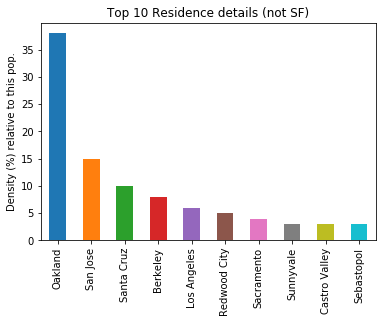

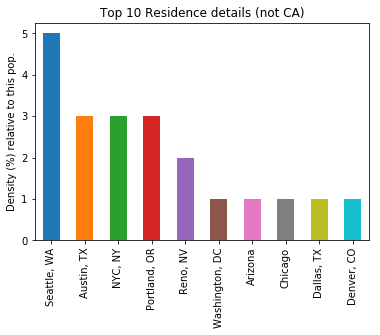

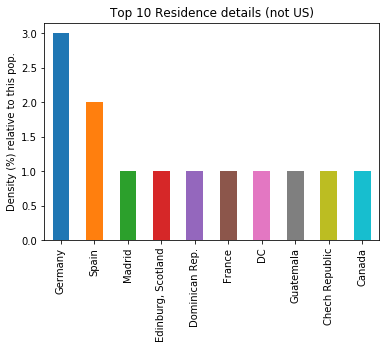

In [31]:
titles=["Top 10 Residence details (not SF)", "Top 10 Residence details (not CA)", "Top 10 Residence details (not US)"]
for i in [2,3,4]:
    vals = rawData.loc[isX2bValid & (rawData.X2a == i),'X2b'].value_counts()[0:10]
    vals.plot.bar()
    plt.title(titles[i-2])
    plt.ylabel("Density (%) relative to this pop.")
    plt.show()

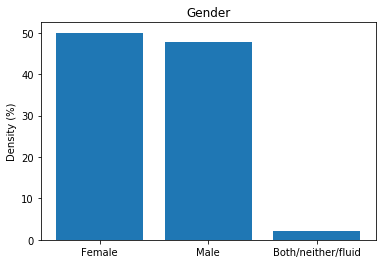

In [32]:
plotCatQ(rawData.loc[isX3Valid], 'X3', weight='weight', title='Gender', xlabels=['Female', 'Male', 'Both/neither/fluid'])

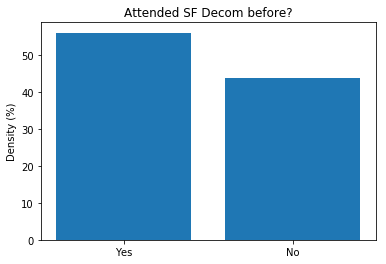

In [33]:
plotCatQ(rawData.loc[isX4Valid], 'X4', weight='weight', title='Attended SF Decom before?', xlabels=['Yes','No'])

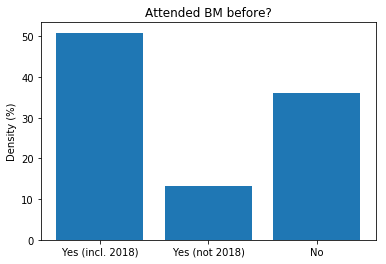

In [34]:
plotCatQ(rawData.loc[isX5aValid], 'X5a', weight='weight', title='Attended BM before?', xlabels=['Yes (incl. 2018)','Yes (not 2018)', 'No'])

Text(0.5,0,'years')

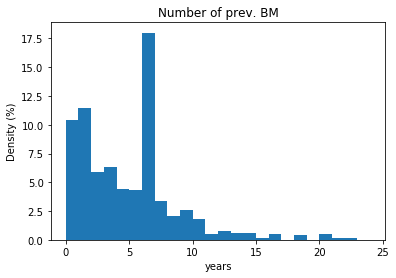

In [35]:
bins = np.arange(0, 25, 1)
plt.hist(rawData.loc[isX5bValid, 'X5b'],bins,weights=(rawData.loc[isX5bValid,'weight']*100.0 / rawData.loc[isX5bValid,'weight'].sum()))
plt.title("Number of prev. BM")
plt.ylabel("Density (%)")
plt.xlabel("years")

### Plot bi-viariate distributions

weight  Density(%)
X4 X5a                         
1  1    3796.505117   37.527985
   2    1010.927187    9.992891
   3     887.159901    8.769466
2  1    1349.689242   13.341512
   2     320.917583    3.172231
   3    2751.265088   27.195916

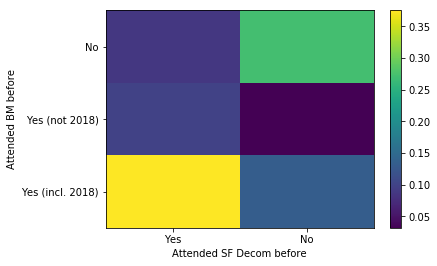

In [36]:
xBins=np.arange(0.5,3+0.5,1.0)
yBins=np.arange(0.5,4+0.5,1.0)
h=plt.hist2d(rawData.loc[isX5aValid & isX4Valid,'X4'], rawData.loc[isX5aValid & isX4Valid,'X5a'], bins=[xBins, yBins], weights=rawData.loc[isX5aValid & isX4Valid,'weight'],normed=True)
plt.colorbar(h[3])
plt.xticks(np.arange(1,3,1.0),  ['Yes', 'No'])
plt.yticks(np.arange(1,4,1.0),  ['Yes (incl. 2018)','Yes (not 2018)', 'No'])
plt.xlabel('Attended SF Decom before')
plt.ylabel('Attended BM before')
outTable = rawData.loc[isX5aValid & isX4Valid].groupby(['X4','X5a']).agg({'weight':'sum'})
outTable['Density(%)'] = outTable['weight'] * 100. / outTable['weight'].sum()
outTable